In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
import warnings
from matplotlib import style
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
df=pd.read_csv('weather_prediction_dataset.csv')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [104]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [105]:
df['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

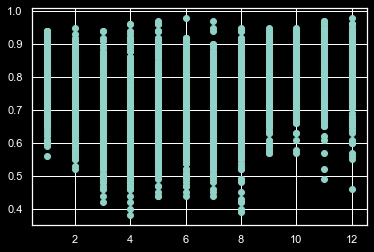

In [106]:
style.use('dark_background')
plt.scatter(df['MONTH'],df['BASEL_humidity'])

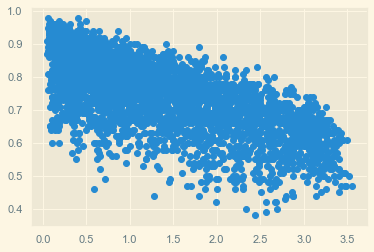

In [107]:
style.use('Solarize_Light2')
plt.scatter(df['BASEL_global_radiation'],df['BASEL_humidity'])

In [108]:
df=df.drop(columns=['DATE'])

In [109]:
corr=df.corr()

<AxesSubplot:>

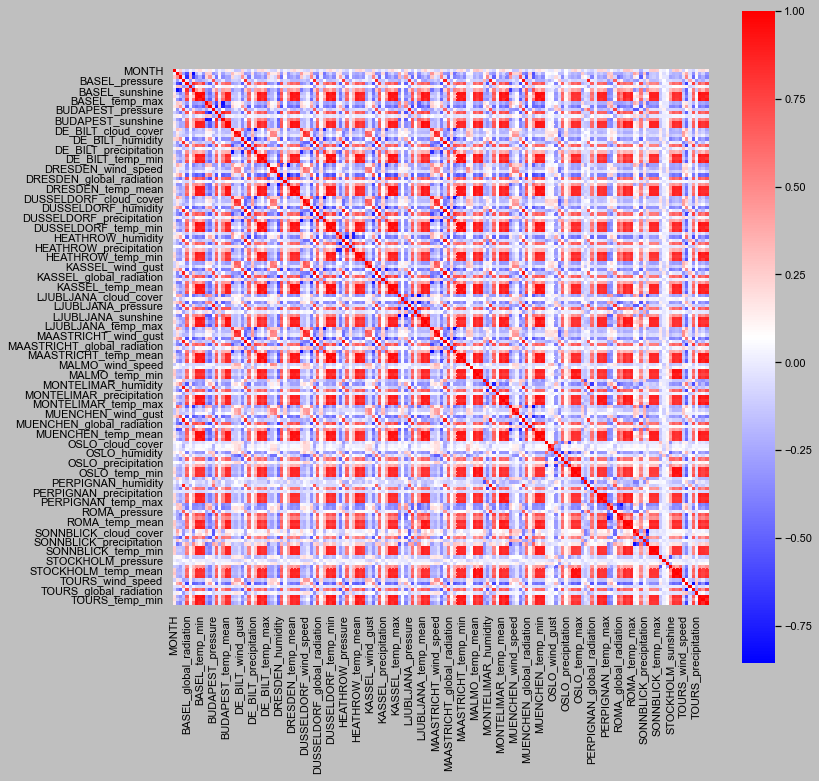

In [110]:
style.use('grayscale')
plt.figure(figsize=[12,12])
sns.heatmap(corr,cmap='bwr',square=True)

In [111]:
pca=PCA(n_components=3)

In [112]:
x=pca.fit_transform(df)

In [113]:
means=KMeans(n_clusters=2,init='k-means++',max_iter=300)

In [114]:
y_predict=means.fit_predict(x)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
df = pd.read_csv('weather_prediction_dataset.csv')
labels = pd.read_csv('weather_prediction_bbq_labels.csv')

In [117]:
labels.head(4)

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [119]:
df_budapest = pd.concat([df.iloc[:,:2],df.iloc[:,11:19]],axis=1)
df_budapest['DATE'] = pd.to_datetime(df_budapest['DATE'],format='%Y%m%d')

In [120]:
def mean_for_mth(feature):
    mean = []
    for x in range(12):
        mean.append(
            float("{:.2f}".format(df_budapest[df_budapest['MONTH'] == (x+1)][feature].mean())))
    return mean

In [121]:
df_budapest.drop(['MONTH'],axis=1).describe()

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,16.629091
std,2.386442,0.149603,0.007795,0.977986,0.408932,4.475439,8.744451,9.981538
min,0.000000,0.260000,0.989100,0.040000,0.000000,0.000000,-9.800000,-6.600000
25%,3.000000,0.540000,1.012100,0.580000,0.000000,1.100000,5.100000,8.400000
50%,5.000000,0.650000,1.016500,1.340000,0.000000,5.900000,12.800000,17.400000
75%,7.000000,0.770000,1.021475,2.310000,0.030000,9.600000,19.300000,25.000000
max,8.000000,1.000000,1.043800,3.490000,6.960000,14.900000,33.100000,40.100000


Text(0, 0.5, 'DEGREE')

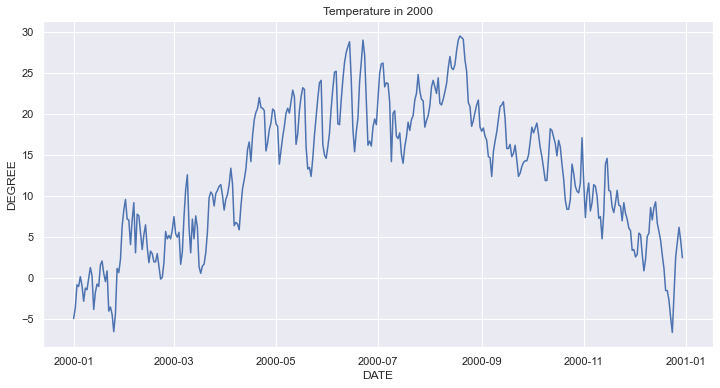

In [122]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.plot(df_budapest['DATE'][:365],df_budapest['BUDAPEST_temp_mean'][:365])
plt.title('Temperature in 2000')
plt.xlabel('DATE')
plt.ylabel('DEGREE')

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

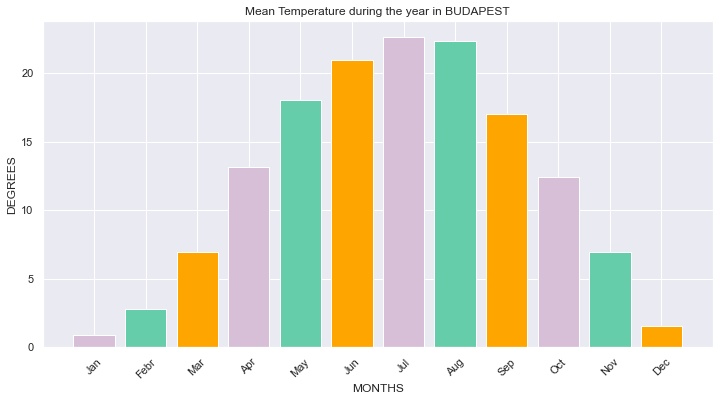

In [123]:
months = ['Jan', 'Febr', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_temp = mean_for_mth('BUDAPEST_temp_mean')
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
bar = plt.bar(x = months,height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine',                'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('DEGREES')
plt.title('Mean Temperature during the year in BUDAPEST')
plt.bar_label(bar)

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

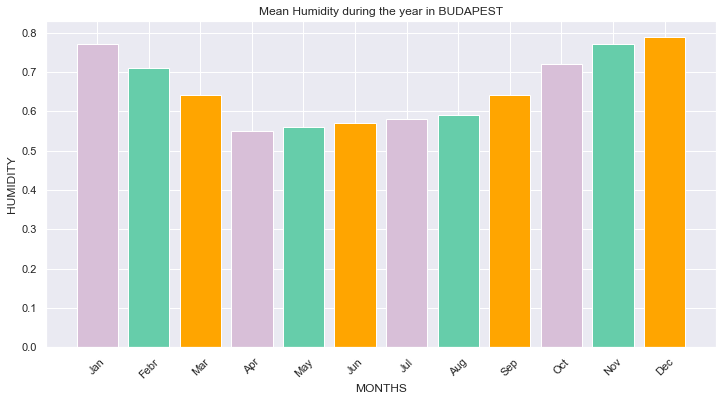

In [124]:
sns.set(style="darkgrid")
mean_temp = mean_for_mth('BUDAPEST_humidity')
plt.figure(figsize=(12,6))
bar = plt.bar(x = months, height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine',                'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('HUMIDITY')
plt.title('Mean Humidity during the year in BUDAPEST')
plt.bar_label(bar)

<AxesSubplot:xlabel='BUDAPEST_global_radiation', ylabel='Count'>

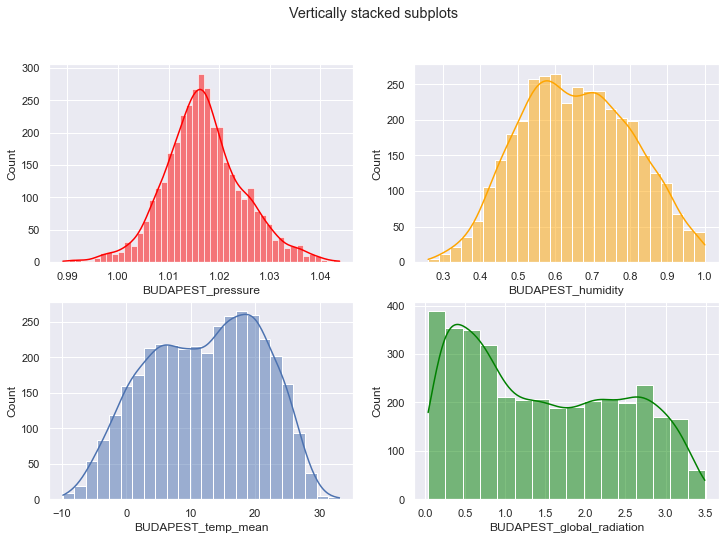

In [125]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('Vertically stacked subplots')
sns.histplot(data = df_budapest, x ='BUDAPEST_pressure', ax=axs[0,0], color='red', kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_humidity', ax=axs[0,1], color='orange', kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_temp_mean', ax=axs[1,0], kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_global_radiation', ax=axs[1,1], color='green', kde=True)

[Text(0.5, 1.0, 'Labels for BUDAPEST')]

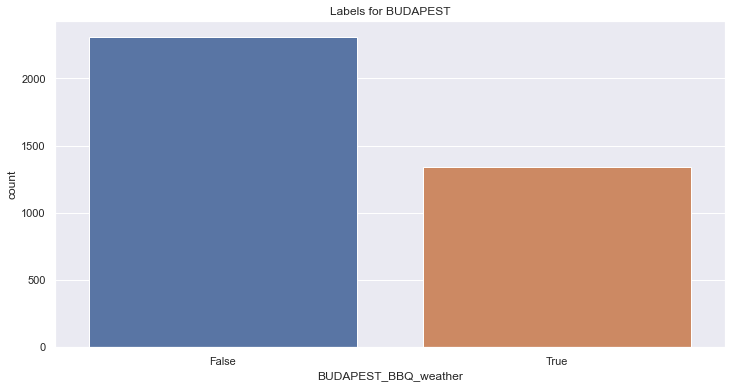

In [126]:
labels_budapest = labels['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = labels_budapest).set(title='Labels for BUDAPEST')

In [127]:
true_val = len(labels_budapest[labels_budapest == True])
false_val = len(labels_budapest[labels_budapest == False])
print('Precent of True values: {0:.2f}%'.format(true_val/(true_val+false_val)*100))
print('Precent of False values: {0:.2f}%'.format(false_val/(true_val+false_val)*100))

Precent of True values: 36.75%
Precent of False values: 63.25%


[Text(0.5, 1.0, 'Relation between the temperature and the bbq weather')]

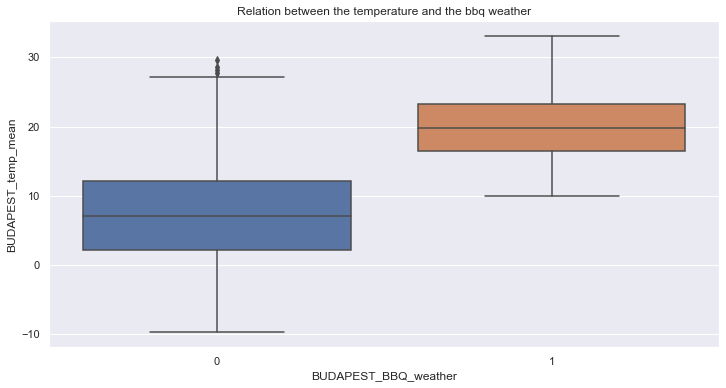

In [128]:
labels_budapest = labels_budapest.astype(int)
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.boxplot(y = df_budapest['BUDAPEST_temp_mean'], x = labels_budapest).set(title='Relation between the temperature and the bbq weather')